# Table of Contents
* [TP2 - Discrimination de bonnes ou mauvaises réponses dans une base de questions-réponses.](#TP2---Discrimination-de-bonnes-ou-mauvaises-réponses-dans-une-base-de-questions-réponses.)
	* [Première partie : récupérer les données](#Première-partie-:-récupérer-les-données)
		* [Récupération sur plusieurs années](#Récupération-sur-plusieurs-années)
	* [Deuxième partie: Trouver et définir des features](#Deuxième-partie:-Trouver-et-définir-des-features)
		* [Lecture de données](#Lecture-de-données)
		* [Construction de variables explicatives ](#Construction-de-variables-explicatives)
	* [Troisième partie: discrimination](#Troisième-partie:-discrimination)
		* [Première question](#Première-question)
		* [Seconde question](#Seconde-question)
		* [Tertio ](#Tertio)


In [1]:
import numpy as np
import pandas as pd

In [2]:
%%HTML
<style>
em {
    color: green;
}
strong
{
    color: blue;
}
</style>

# TP2 (corrigé) - Discrimination de bonnes ou mauvaises réponses dans une base de questions-réponses.

**Installation**: Vous téléchargerez le fichier [install_tp2](install_tp2)  dans un répertoire local qui vous va bien. Ceci étant fait, vous ouvrez un terminal, vous rendez dans ce répertoire, changez les droits d'accès au fichier par `chmod 755 install_tp2` de sorte à le rendre exécutable. Vous exécuterez ensuite le fichier par `./install_tp2`. Si tout va bien, il devrait créer un sous répertoire tp2, télécharger les documents et données utiles. Vous disposerez ensuite d'une commande `notebook` qui permet de lancer le notebook ipython après avoir reconfiguré 2 variables d'environnement. 

![111](./Enluminure.png)

L'un des objectifs de ce TP est d'illustrer une méthode de discrimination, la régression logistique, sur des données internet réelles. Au passage, on verra également deux autres points importants dans l'analyse de données : 
- récupérer les données
- extraire, construire, des variables explicatives de ces données (*feature extraction*)

Les données auxquelles on s'intéressera sont *les réponses* fournies dans une base de type Stackoverflow. Plus exactement, on veut examiner des moyens d'évaluer la qualité des réponses fournies de manière automatique, avant même leur évaluation par des évaluateurs humains; éventuellement pour mettre en place une évaluation ou un guide automatique à la rédaction. Ici on ne prendra pas en compte le "sens", aussi l'exercice est particulièrement difficile, et il ne peut pas vraiment y avoir de miracle.  Voici quelques exemples de questions-réponses :

- [Exemple de question avec réponse négative](http://stackoverflow.com/questions/886955/breaking-out-of-nested-loops-in-java)

- [Un autre](http://stackoverflow.com/questions/3061/calling-a-function-of-a-module-from-a-string-with-the-functions-name-in-python)

- [Et encore une](http://stackoverflow.com/questions/9001509/how-can-i-sort-a-python-dictionary-sort-by-key)

- [Et une de plus](http://stackoverflow.com/questions/6797984/how-to-convert-string-to-lowercase-in-python)

A partir de là, voici quelques exemples des questions que l'on peut se poser :

- est-il possible de discriminer les réponses acceptées des non-acceptées ?
- est-il possible de discriminer les réponses correctes (note >0) des autres ?
- est-il possible de discriminer les réponses très bonnes réponses (note >10) des autres ?


Le problème est très difficile, la base est très bruitée. Voyons donc..

## Première partie : récupérer les données

Assez sympatiquement, Stackexchange fournit une API pour interroger ses bases. L'adresse et la documentation de l'API est :
[https://api.stackexchange.com/](https://api.stackexchange.com/)

Pour sélectionner des données à récupérer sur Stack, on peut configurer la requête via la page suivante :

[https://api.stackexchange.com/docs/advanced-search](https://api.stackexchange.com/docs/advanced-search)
Cette page permet de configurer le filtrage des données et les champs renvoyés. ceci est encodé dans le paramètre `filter` de la requête. 

La requête suivante permet ainsi de récupérer les 9 dernières questions, avec une réponse acceptée, à propos d'ipython :

https://api.stackexchange.com/docs/advanced-search#pagesize=9&order=desc&sort=activity&accepted=True&closed=True&tagged=ipython&filter=!*L1(ZTe*8)k0CMEL&site=stackoverflow&run=true 

> Faites le !

Les réponses peuvent être obtenues au format JSON (simplement en enlevant les deux dernières configs -- run et site). Par exemple, on utilisera

https://api.stackexchange.com/2.2/search/advanced?pagesize=9&order=desc&sort=activity&accepted=True&closed=True&tagged=ipython&site=stackoverflow&filter=!*L1(ZTe*8)k0CMEL

> Faites le !

Comme on le voit, le résultat est un fichier json, qui est similaire (mais pas totalement identique) à un dictionnaire Python. Pour récupérer des données, il suffit donc d'envoyer une série de reqêtes, de trier et d'enregistrer les réponses retournées. On se propose d'interrorger l'API avec le mot clé "python", entre deux dates, et de sauvegarder les réponses dans des fichiers csv. Commençons par le début : 

Le module `requests` est un module Python pratique qui permet d'envoyer des requêtes hhtp et de récupérer le résultat. 

> Consultez l'aide de `requests`

In [3]:
import requests
# demandez l'aide de ce module

In [4]:
?requests

>- en utilisant le module `requests` (`requests.get`, attribut `content` ), récupérez les données associées à la requête 
https://api.stackexchange.com/2.2/search/advanced?fromdate=1422748800&todate=1423440000&order=desc&sort=activity&accepted=True&tagged=ipython&site=stackoverflow&filter=!SlE.x1mh.L6ZoGtJtT". Vous devrez décoder la réponse en utf8 en ajoutant un `.decode("utf8")`.  
Convertissez ensuite la réponse en dictionnaire à l'aide du module `json` (méthode `json.load`). Vous aurez besoin au passage d'utiliser `StringIO`, du module `io` qui permet d'associer un descripteur de fichier à un texte. 

In [5]:
import requests
from io import StringIO 
import json

Corrigé

In [6]:
#r=requests.get("https://api.stackexchange.com/2.2/search/advanced?fromdate=1422748800&todate=1423440000&order=desc&sort=activity&closed=False&tagged=ipython&site=stackoverflow&filter=!SlE.x1mh.L6ZoGtJtT")
r=requests.get("https://api.stackexchange.com/2.2/search/advanced?fromdate=1422748800&todate=1423440000&order=desc&sort=activity&accepted=True&False&tagged=ipython&site=stackoverflow&filter=!SlE.x1mh.L6ZoGtJtT")

ans=r.content
ans=ans.decode('utf8')
dico_reponses=json.load(StringIO(ans))

> Vous obtiendrez un dictionnaire, disons `dico_reponses`, que vous examinerez : afficher le dictionnaire, les clés, le contenu de la clé `items`, d'un élement de la clé items, par exemple `dico_reponses['items'][2]`

Corrigé

In [7]:
#on se le sauve, sait-on jamais...
"""
import pickle
with open("exemple_dico.pkl","wb") as f:
    pickle.dump(dico_reponses,f)
"""    

'\nimport pickle\nwith open("exemple_dico.pkl","wb") as f:\n    pickle.dump(dico_reponses,f)\n'

Le dictionnaire obtenu possède une clé `items` à laquelle est associée une liste de dictionnaires, qui chacun décrivent les différentes réponses... 

In [8]:
dico_reponses.keys()

dict_keys(['items', 'quota_max', 'has_more', 'quota_remaining'])

On aura par exemple

In [9]:
dico_reponses['items'][2]

{'accepted_answer_id': 28333789,
 'answer_count': 2,
 'answers': [{'answer_id': 28333789,
   'body': '<p>This is from ipython starter script in linux.</p>\n\n<pre><code>from IPython import start_ipython\nstart_ipython()\n</code></pre>\n',
   'comment_count': 1,
   'comments': [{'comment_id': 45015091}],
   'creation_date': 1423093859,
   'is_accepted': True,
   'last_activity_date': 1423093859,
   'question_id': 28333629,
   'score': 1},
  {'answer_id': 28334138,
   'body': "<p>By following the lead of <code>Scripts\\ipython-script.py</code> and looking at what <code>pkg_resources.load_entry_point</code> returns in various cases, I ended up with the following script, which seems to cover all my bases:</p>\n\n<pre><code>import sys\nimport IPython\ntry:\n    from IPython import start_ipython as entry_point\nexcept ImportError:\n    try:\n        from IPython.terminal.ipapp import launch_new_instance as entry_point\n    except ImportError:\n        try:\n            from IPython.frontend.

Pour faire varier les dates, il faut convertir celles-ci en epoch Unix. Cela peut se faire par : 

In [10]:
import datetime
from datetime import timezone
print("date de maintenant: ", datetime.datetime.now())
print("convertie :",datetime.datetime.now().replace(tzinfo=timezone.utc).timestamp())
#Pour convertir une date quelconque :
print(datetime.datetime(2015,3,8).replace(tzinfo=timezone.utc).timestamp())

date de maintenant:  2017-03-22 09:15:27.397884
convertie : 1490174127.398341
1425772800.0


Sans enregistrement, il y une limite de 300 requêtes par jour. Pour disposer de quotas plus élevés, il faut demander une clé développeur, à l'adresse suivante : 
https://stackapps.com/users/login?returnurl=/apps/oauth/register.
La clé correspondant à l'utilisateur "Essais_ESIEE"  (Client Id 441) est 

> Key ACNpxD0PS7)lMe*lkPPOWw((

Ajouter un champ &key=ACNpxD0PS7)lMe*lkPPOWw((&  dans la requête.

Par ailleurs, Stackoverflow ne renvoie pas toutes les données, mais uniquement des "pages" (pour éviter les requêtes délirantes et la saturation de ses serveurs). La réponse contient une clé `has_more` qui si elle est True, dit qu'il faut passer à la page suivante. La requête peut contenir un paramètre `&page=`  qui permet d'indiquer cette page. Cette question n'est bien entendu pas essentielle, mais on vous invite à y réfléchir au moins un peu. 

>- Ecrire les quelques lignes qui permettraient de récupérer les données entre deux dates spécifiées (y,m, d), . Stocker le résultat dans une liste

In [11]:
n=0
topic="perl"     # sujet de la requête (vous pouvez le changer !)
todate=int(datetime.datetime(2015,3,10).replace(tzinfo=timezone.utc).timestamp())
fromdate=int(datetime.datetime(2015,3,1).replace(tzinfo=timezone.utc).timestamp())
qadict=dict()     # Dictionnaire dans lequel on lira la réponse
stock=[]          # Liste dans laquelle on stockera les résultats
## Si ans est la réponse à la requête, on peut convertir le json en dictionnaire python par
# qadict=json.load(StringIO(ans))

In [12]:
#qadict['has_more']=True
#while qadict['has_more']:
#    n=n+1
#    print("Itération {}".format(n))
    # A vous de compléter ici
    # qadict=json.load(StringIO(ans))
    # A vous de compléter ici
#print("Fini")    

Corrigé :

In [13]:
qadict['has_more']=True
while qadict['has_more']:
    n=n+1
    print("Itération {}".format(n))
    req="https://api.stackexchange.com/2.2/search/advanced?key=ACNpxD0PS7)lMe*lkPPOWw((&page={0}&fromdate={1}&todate={2}&order=desc&sort=activity&accepted=True&tagged={3}&site=stackoverflow&filter=!SlE.x1mh.L6ZoGtJtT".format(n,fromdate,todate,topic)
    r=requests.get(req)
    ans=r.content
    ans=ans.decode('utf8')
    qadict=json.load(StringIO(ans))
    stock.append(qadict)
print("Fini")    

Itération 1
Itération 2
Itération 3
Itération 4
Fini


Il faut ensuite stocker les résultats dans des fichiers. On se propose de le faire dans des fichiers de type csv. Une difficulté ici est que le nombre de réponses varie question par question, alors que le format d'un fichier csv est figé. Dans ce qui suit, on utilise un maximum de 6 réponses par question, initialisées à vide, et on stocke les différentes données. 

On va ensuite boucler sur le temps, en faisant varier les champs de date dans les requêtes, de manière à récupérer pas mal de données. On ne va pas vous le faire faire car cela prend pas mal de temps, à programmer comme à éxecuter (plusieurs jours), et ce n'est pas l'objectif principal du cours. 

Les fonctions suivantes sont donc fournies **à titre de documentation**. Les suggestions d'amélioration sont bienvenues. Vous êtes cependant invités à parcourir le code pour comprendre ce qui se passe. 



### Récupération sur plusieurs années

Pour écrire les données dans un fichier csv, nous utilisons  les fonctions suivantes :

```python
def cdico_init(nmax=6):
    """
    Initialise le dictionnaire dans lequel on va écrire les différents champs des réponses
    """
    cdico={}
    body_keys = ['answer{}_body'.format(ii) for ii in range(1,nmax)]
    score_keys =  ['answer{}_score'.format(ii) for ii in range(1,nmax)]
    nbcomments_keys =  ['answer{}_nbcomments'.format(ii) for ii in range(1,nmax)]
    for key in body_keys: cdico[key]=""
    for key in score_keys: cdico[key]=0
    for key in nbcomments_keys: cdico[key]=0
    cdico['accepted']=None    
    return cdico
```    

```python
def save_qa(csvfilename,qa_dict,mode='wt',nmax=6):
    """
    Fonction de sauvegarde des réponses json en un fichier csv de nom "csvfilename". 
    Par défaut, ce fichier est ouvert en mode "wt", mode texte, écriture et écrase si 
    le fichier existe. le nombre maximal de réponses est nmax. on utilise la méthode 
    DictWriter du module csv pour écrire le fichier. 
    """
    import csv
    fieldnames=['creation_date','question_id', 'tags', 'question_title', 'question_body', 'answer_count', 'accepted']
    for n in range(nmax):
        fieldnames.append('answer{}_body'.format(n))
        fieldnames.append('answer{}_score'.format(n))
        fieldnames.append('answer{}_nbcomments'.format(n))

    csvfile=open(csvfilename, mode, encoding='utf8')    
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames,quoting=csv.QUOTE_ALL)
    if mode=='wt': 
        print("writing header")
        writer.writeheader()    

    for k in range(len(qa_dict['items'])):
        #print("*"*40)
        if qa_dict['items'][k]['is_answered']:
            cdico=cdico_init(nmax)
            cdico['creation_date']= qa_dict['items'][k]['creation_date']
            cdico['question_id']= qa_dict['items'][k]['question_id']
            cdico['tags']= qa_dict['items'][k]['tags']
            cdico['question_title']= qa_dict['items'][k]['title']
            cdico['question_body']= qa_dict['items'][k]['body']
            cdico['answer_count']= qa_dict['items'][k]['answer_count']
            try:
                answers=qa_dict['items'][k]['answers']        
            except:
                answers=[]
            for n,answer in enumerate(answers):
                if n>=nmax: break  
                if answer['is_accepted']:
                    cdico['accepted']=n
                cdico['answer{}_body'.format(n)] =  answer['body']
                cdico['answer{}_score'.format(n)] =  answer['score']
                cdico['answer{}_nbcomments'.format(n)] =  answer['comment_count']
            
            writer.writerow(cdico)    
    csvfile.close() 
```    

Boucle de lecture et de stockage des données sur plusieurs années (entre 2008 et 2015)

```python
import requests            
from io import StringIO 
import json
import datetime, time

#for topic in ('ipython', 'python'):
for topic in ['python']:
    #init date initiale
    todate=int(datetime.datetime(2008,12,1).replace(tzinfo=timezone.utc).timestamp()) #
    # Boucle sur années et mois ----------------------
    for year in range(2008,2015): # 2009
        for month in range(1,13):
            print("#"*60)
            print("topic", topic,"year",year)

            fromdate=todate #int(datetime.datetime(year,1,1).replace(tzinfo=timezone.utc).timestamp()) #2011
            todate=int(datetime.datetime(year,month,1).replace(tzinfo=timezone.utc).timestamp()) #2011
            #nom du fichier de sauvegarde
            csvfilename='qa_'+topic+'_'+str(datetime.date(year,month,1))+'.csv'
            #autres inits
            n=0
            qadict=dict()
            qadict['has_more']=True
            #
            # boucle sur les segnments de la réponse
            #
            while qadict['has_more']:
                n=n+1
                req="https://api.stackexchange.com/2.2/search/advanced?key=ACNpxD0PS7)lMe*lkPPOWw((&page={0}&fromdate={1}&todate={2}&order=desc&sort=activity&accepted=True&tagged={3}&site=stackoverflow&filter=!SlE.x1mh.L6ZoGtJtT".format(n,fromdate,todate,topic)
                r=requests.get(req)
                ans=r.content
                ans=ans.decode('utf8')
                qadict=json.load(StringIO(ans))
                        # save
                print("Saving shrink n=",n)
                mode='wt' if n==1 else 'at'
                save_qa(csvfilename,qadict,mode,nmax=6)
                time.sleep(5)
```

## Deuxième partie: Trouver et définir des features

Une étape très importante avant l'analyse des données proprement dite est d'extraire, de construire éventuellement, des variables qui permettront de distinguer les classes d'intérêt (variables explicatives). C'est ce qu'on se propose de faire dans cette partie. 

L'un des fichiers générés est fourni ici : `qa_python_2014-11-01.csv` (réponses à la requête "Python" pour le mois de novembre 2014. Uniquement les questions comportant une réponse acceptée. 14 Mo ! L'ensemble des fichiers représente une taille de 655 Mo ! Chaque ligne contient la question posée, six des réponses apportées, avec leurs scores respectifs et les textes des réponses. C'est sur les textes es réponses que l'on va travailler. 

### Lecture de données

>A l'aide du module pandas, il est particulièrement simple de charger un fichier csv. Chargez le fichier csv précédent, sous le nom df,  en utilisant la méthode `pd.read_csv`. Enumérer les colonnes et affichez la description par respectivement `df.columns` et `df.describe()` 

In [14]:
import pandas as pd
# A vous de jouer ensuite
#...

Corrigé : 

In [15]:
import pandas as pd
df=pd.read_csv('qa_python_2014-11-01.csv')

On peut lister les colonnes par `df.columns` et un résumé numérique par  `df.describe()

In [16]:
df.columns

Index(['creation_date', 'question_id', 'tags', 'question_title',
       'question_body', 'answer_count', 'accepted', 'answer0_body',
       'answer0_score', 'answer0_nbcomments', 'answer1_body', 'answer1_score',
       'answer1_nbcomments', 'answer2_body', 'answer2_score',
       'answer2_nbcomments', 'answer3_body', 'answer3_score',
       'answer3_nbcomments', 'answer4_body', 'answer4_score',
       'answer4_nbcomments', 'answer5_body', 'answer5_score',
       'answer5_nbcomments'],
      dtype='object')

In [17]:
df.describe()

,creation_date,question_id,answer_count,accepted,answer0_score,answer0_nbcomments,answer1_score,answer1_nbcomments,answer2_score,answer2_nbcomments,answer3_score,answer3_nbcomments,answer4_score,answer4_nbcomments,answer5_score,answer5_nbcomments
count,5.220000e+03,5220.000000,5220.000000,5219.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000
mean,1.413503e+09,26409943.429693,1.557471,0.262119,1.321839,1.784674,0.385441,0.449042,0.113793,0.127778,0.026437,0.027969,0.006705,0.012069,0.000958,0.002874
std,7.776262e+05,159056.663017,0.862201,0.584294,2.240875,2.352935,1.242914,1.323614,0.582758,0.727709,0.284475,0.350708,0.130415,0.263454,0.045900,0.114946
min,1.412122e+09,26132192.000000,1.000000,0.000000,-3.000000,0.000000,-3.000000,0.000000,-2.000000,0.000000,-3.000000,0.000000,-3.000000,0.000000,-1.000000,0.000000
25%,1.412835e+09,26271689.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.413493e+09,26413737.500000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.414155e+09,26548252.750000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.414798e+09,26765549.000000,8.000000,5.000000,119.000000,24.000000,56.000000,24.000000,15.000000,11.000000,10.000000,11.000000,3.000000,12.000000,2.000000,6.000000


Sélectionnons le texte de l'une des réponses

Pour sélectionner une donnée dans la dataframe `df`, on peut adresser d'abord la colonne, puis la ligne, suivant `df[label_de_la_colonne][index de la ligne]`.  
>Afficher le score et le texte de la première réponse (answer0) correspondant à la 21e question. Sauvegardez le texte de la réponse dans une variable `tst_texte`.

Corrigé :

In [18]:
# la question no 21, 
print("Score : ", df['answer0_score'][21], "\n")
print(df['answer0_body'][21])
tst_texte=df['answer0_body'][21]

Score :  8 

<p>Stupid idea: make a first pass to divide all the different items in groups that can be compared between each other, sort the individual groups and finally concatenate them. I assume that an item is comparable to all members of a group, if it is comparable with the first member of a group. Something like this (Python3):</p>

<pre><code>import itertools

def python2sort(x):
    it = iter(x)
    groups = [[next(it)]]
    for item in it:
        for group in groups:
            try:
                item &lt; group[0]  # exception if not comparable
                group.append(item)
                break
            except TypeError:
                continue
        else:  # did not break, make new group
            groups.append([item])
    print(groups)  # for debugging
    return itertools.chain.from_iterable(sorted(group) for group in groups)
</code></pre>

<p>This will have quadratic running time in the pathetic case that none of the items are comparable, but I guess th

### Construction de variables explicatives 

A partir de ce texte, on veut construire différents indicateurs de "qualité". Des indicateurs de base seront bien-entendu

- la longueur du texte, 
- nombre de mots, 
- le nombre de lignes,
- le nombre de lignes de code,
- les références (liens internet),
- la mise en forme (gras, italique, etc).

On pourrait y ajouter

- nombre de mots en majuscule (mauvais style),
- nombre d'images,
- nombre de mots moyen par phrase...

Les suggestions sont bienvenues. 

Voici un exemple d'une telle fonction. 

In [19]:
import re
def nb_paragraphs(text):
    nb_p=len(re.findall("<p>",text))
    return nb_p

#exemple
nb_paragraphs(tst_texte)

3

> - Choisissez deux ou trois de ces caractéristiques et écrivez les fonctions permettant d'extraire les paramètres associés. 

Vous en profiterez pour manipuler les expressions régulières, qui ont été présentées (ou pas) lors du cours sur le [kit de survie](http://perso.esiee.fr/~bercherj/IT3007/Intro_Python.html#Expressions-régulières). L'exemple traité a été choisi en lien avec le problème qui nous occupe...

En utilisant `re.findall` vous devriez pouvoir extraire au moins le nombre d'images, le nombre de liens, de nombre de mots en majuscules. Pour le nombre de mots, il suffit de faire un `.split()`, un split sur les \n pour compter le nombre de lignes. Les autres sont un peu plus compliquées. 

In [20]:
# fonction qui extrait calcule..
# A vous de faire
#

In [21]:
# fonction qui extrait calcule..
# A vous de faire
#

Le corrigé fournit une classe `answer_metrics` qui permet de calculer tout un tas de métriques associées à un texte. 

>Importez la classe en question par 

>     from answer_metrics import *
>Consultez son aide par   

>      help(answer_metrics)

>Vous pouvez regarder comment elle est faite par 

>      %load anwer_metrics

> calculer le nombre de lignes total, de lignes de code, de nombre de liens sur la chaîne `tst_texte` 

In [22]:
from answer_metrics import *

Corrigé : 

In [23]:
import re
aa=answer_metrics()
aa(tst_texte)
#print("texte : ",aa.text)
print("nb de lignes : ", aa.nb_lines())
print("nb de lignes de code : ", aa.nb_codelines())
print("nb de liens : ", aa.nb_links())

You  need to feed the object with a text
nb de lignes :  10
nb de lignes de code :  22
nb de liens :  0


La classe answer_metrics :

In [24]:
#%%file answer_metrics.py 
import re
class answer_metrics():
    """
     Calcul de tout un tas de métriques associées à un texte. 
     'av_words' : nombre moyen de mots par phrase
     'code' :  code contenu dans le texte
     'extract_code' : métode pour extraire le code
     'html' :  texte initial
     'len_html' : longueur du html
     'nb_allcaps' : nombre de mots en majuscules
     'nb_codelines' : nombre de lignes de code
     'nb_imgs' : nombre d'images
     'nb_lines' : nombre de lignes
     'nb_links' : nombre de liens
     'nb_paragraphs' : nombre de paragraphes
     'nb_pretty' : nombre de mises en forme gras, italique, souligné,  
     'nb_words' : nombre de mots
     'strip_code' : méthode pour retirer le code
     'striphtml' : méthode pour retirer le texte html
     'text' : le texte sans html
     =================================================
     auteur: jfb mars 2015
    
    """
    import re
    def __init__(self,text=None):
        if text is None: 
            print("You  need to feed the object with a text")
        else:    
            self.html=text
            self.code=self.extract_code()
            self.text=self.striphtml(self.strip_code())
        
    def __call__(self,text=None):
        if text is None: 
            print("You  must feed the object with a text")
        else:    
            self.html=text
            self.code=self.extract_code()
            self.text=self.striphtml(self.strip_code())                    

    def striphtml(self,text):
        return re.sub('<[^<]+?>', '', text)
    
    def len_html(self):
        return len(self.html) 
    
    def extract_code(self):
        out=re.findall('<pre><code>([\s\S]*?)</code></pre>', self.html)
        return out
    
    def nb_paragraphs(self):
        nb_p=len(re.findall("<p>",self.html))
        return nb_p
    
    def strip_code(self):
        out=re.sub('<pre><code>([\s\S]*?)</code></pre>', '',self.html)
        return out

    def nb_codelines(self):
        Lcode=0
        for code in self.code:
            Lcode=Lcode+len(code.split('\n'))-1 #not perfect. Fails on expression involving \n
        return Lcode

    def nb_lines(self):
        Llines=len(self.text.split('\n'))
        return Llines

    def nb_allcaps(self):
        allcaps=re.findall('\\b[A-Z]{2,}\\b',self.text)
        Lallcaps=len(allcaps)
        return Lallcaps

    def nb_words(self):
        Nbwords=len(self.text.split())
        return Nbwords

    def av_words(self):
        sentences=re.split("\\w[\.!?]",self.text)
        nb_sentences=len(sentences)
        nb_words=0
        for sentence in sentences: nb_words+=len(sentence.split())
        return nb_words, nb_words/nb_sentences    
    
    def nb_pretty(self):
        return len(re.findall('<strong>',self.html))+\
                len(re.findall('<li>',self.html))+\
                len(re.findall('<em>',self.html))

    def nb_links(self):
        links=re.findall('<a href="http://.*?".*?>(.*?)</a>',self.html)
        nb_links=len(links)
        return nb_links

    def nb_imgs(self):
        imgs=re.findall('<img(.*?)/>',self.html)
        nb_imgs=len(imgs)
        return nb_imgs    

a=answer_metrics (tst_texte)       

### Calcul des métriques pour l'ensemble des réponses de la base

Ceci en main, il est possible d'associer un ensemble de métriques à chacune des réponses. Il faut donc relire tous les fichiers csv dans lesquels on a stocké toutes les réponses ; et pour chacune calculer les métriques, noter le score obtenu par la réponse et si elle a été acceptée. Tout ceci sera ensuite conservé dans un grand tableau, pour usage ultérieur. 

Comme précédemment, on ne va pas vous le faire faire car cela prend pas mal de temps, et ce n'est pas l'objectif principal du cours. 

Les fonctions suivantes sont donc fournies **à titre de documentation**. Les suggestions d'amélioration sont bienvenues. Vous êtes cependant invités à parcourir le code pour comprendre ce qui se passe. 


Les deux routines suivantes font ce travail là. 

```python
def zaza(qa_file):
    for k in range(nb):
        accepted=df2['accepted'][k]
        if np.isnan(accepted): accepted=0
            
        ans_count=np.min([df2['answer_count'][k], 6]) # we just have stocked a maximum of 6 answers
        if np.isnan(accepted): accepted=0
        all_ans_html=[df2['answer{:d}_body'.format(n)][k] \
                               for n in range(ans_count)]
        all_ans_score=[df2['answer{:d}_score'.format(n)][k] \
                               for n in range(ans_count)]
        
        yield all_ans_html, all_ans_score, accepted
```    

Votre serviteur a fait un certain travail : récupéré toutes les questions réponses sur le thème "python", entre 2007 et 2015. Il a étiqueté tout cela sous la forme d'un énorme tableau. 

```python
import numpy as np

nb_features=10
BigA=np.empty((0,nb_features+2))
BigNA=np.empty((0,nb_features+2))

#Liste de tous les fichiers mensuels de 2008 à 2015
qa_list=['qa_python_{0:}-{1:02d}-01.csv'.format(y,m) for y in 
         [2007,2008,2009,2010, 2011, 2012,2013,2014,2015] for m in range(1,13)]

for qa_file in qa_list:
    print("Processing ",qa_file)
    try:
        df2=pd.read_csv(qa_file)
    except:
        print("read error")
        continue
        
    nb=df2.count()['answer_count']
    A=np.empty((5*nb,nb_features+2))
    NA=np.zeros((5*nb,nb_features+2)); #NA.fill(np.nan)
    nn=-1
    mm=-1
    
    for n,tt in enumerate(zaza(qa_file)):
        all_ans_html, all_ans_score, accepted = tt
        for k,m in enumerate(all_ans_html):
            print("k",k,"accepted", accepted)
            a=answer_metrics (m) 
            score= all_ans_score[k]
            accept=1 if k==accepted else 0
            print("accept",accept)
            if score>-10003:# was >20  or k==accepted:
                mm=mm+1
                A[mm,0:nb_features+2]=np.array([a.nb_allcaps(), a.nb_codelines(), a.nb_paragraphs(), 
                           a.nb_words(), a.nb_lines(), a.nb_links(), a.nb_imgs(), a.av_words()[1],
                           a.len_html(), a.nb_pretty(), score, accept])
            else:
                nn=nn+1
                NA[nn,0:nb_features+2]=np.array([a.nb_allcaps(), a.nb_codelines(), a.nb_paragraphs(), 
                   a.nb_words(), a.nb_lines(), a.nb_links(), a.nb_imgs(), a.av_words()[1],
                   a.len_html(), a.nb_pretty(), score, accept])
    
    if mm!=-1: BigA=np.concatenate((BigA, A[:mm,:]))        
    if nn!=-1: BigNA=np.concatenate((BigNA, NA[:nn,:]))  
```

In [25]:
#Sauvegarde du résultat
"""
# au format pickle
import pickle
with open("A_all_withaccepted.pkl", "wb") as f: 
    pickle.dump(BigA,f)
# et
#au format csv en passant par pandas
Acols = ['nb_allcaps', 'nb_codelines', 'nb_paragraphs', 'nb_words', 'nb_lines', 
         'nb_links', 'nb_imgs', 'av_words', 'len_html', 'nb_pretty', 'score', 'accepted']
AA=pd.DataFrame(BigA), columns=Acols)
AA.to_csv("A_all_withaccepted.csv")
"""

'\n# au format pickle\nimport pickle\nwith open("A_all_withaccepted.pkl", "wb") as f: \n    pickle.dump(BigA,f)\n# et\n#au format csv en passant par pandas\nAcols = [\'nb_allcaps\', \'nb_codelines\', \'nb_paragraphs\', \'nb_words\', \'nb_lines\', \n         \'nb_links\', \'nb_imgs\', \'av_words\', \'len_html\', \'nb_pretty\', \'score\', \'accepted\']\nAA=pd.DataFrame(BigA), columns=Acols)\nAA.to_csv("A_all_withaccepted.csv")\n'

## Troisième partie: discrimination

On va maintenant pouvoir effectuer les tâches de discrimination envisagées au début du texte. Pour cela on commence par importer la table et on analyse les principales caractéristiques de la chose. On créera ensuite une colonne cible 'target' selon le problème à traiter. 

> - Importer la table contenue dans le fichier "A_all_withaccepted.csv" par un `pd.read_csv(...)`. 
Regardez les principales statistiques par un `nom_variable.describe()`. 

Corrigé : 

On peut importer la table par les lignes suivantes (chargement d'un fichier sérialisé pickle) 

     import pickle
     with open("A_all_withaccepted.pkl","rb") as f:
         A=pickle.load(f)
     # la colonne 10 contient les scores
     # la colonne 11 accepté 0 ou 1

Ou encore à partir d'un fichier csv par

In [26]:
AA = pd.read_csv("A_all_withaccepted.csv")

Les statistiques sur chacun des paramètres

In [27]:
AA.describe()

,Unnamed: 0,allcaps,nb_codelines,nb_paragraphs,nb_words,nb_lines,nb_links,nb_imgs,av_words,len_html,pretty,score,accepted
count,402184.000000,402184.000000,402184.000000,402184.000000,402184.000000,402184.000000,402184.000000,402184.000000,402184.000000,402184.000000,402184.000000,402184.000000,402184.000000
mean,201091.500000,0.524486,8.000448,2.762842,60.942424,8.669589,0.428844,0.000234,13.040945,737.231407,0.472058,3.302774,0.497357
std,116100.664669,1.566414,15.269717,2.307524,70.856662,8.357892,0.876122,0.023281,9.052107,789.843799,2.212688,14.246996,0.499994
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,18.000000,0.000000,-18.000000,0.000000
25%,100545.750000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,0.000000,7.333333,295.000000,0.000000,0.000000,0.000000
50%,201091.500000,0.000000,3.000000,2.000000,41.000000,6.000000,0.000000,0.000000,11.500000,518.000000,0.000000,1.000000,0.000000
75%,301637.250000,0.000000,10.000000,3.000000,77.000000,10.000000,1.000000,0.000000,16.666667,903.000000,0.000000,3.000000,1.000000
max,402183.000000,102.000000,753.000000,154.000000,2425.000000,1622.000000,62.000000,10.000000,1027.000000,28959.000000,1008.000000,2725.000000,1.000000


In [28]:
feature = [
    "allcaps", "nb_codelines", "nb_paragraphs", "nb_words", "nb_lines",
    "nb_links", "nb_imgs", "av_words", "len_html", "pretty"
]
cols = feature + ['score', 'accepted']
#évidemment on ne met ni le score ni accepted dans les "features" sinon ce serait un peu facile...

On normalise les features, c'est-à-dire qu'on retire la moyenne et qu'on normalise par l'écart type

In [29]:
"""
dataset=AA
##feature normalization - ça permet de gagner 1/2 %
for feat_col in cols[:-2]:
    m=dataset[feat_col].mean()
    s=dataset[feat_col].std()
    print(feat_col,m,s)
    #dotaset[feat_col]=dataset[feat_col].apply(lambda x: (x-m)/s)
    dataset[feat_col]=(dataset[feat_col]-m)/s
    dataset[feat_col+'2']=dataset[feat_col]**2#.apply(lambda x: x**2)
dataset.describe()   
"""

"\ndataset=AA\n##feature normalization - ça permet de gagner 1/2 %\nfor feat_col in cols[:-2]:\n    m=dataset[feat_col].mean()\n    s=dataset[feat_col].std()\n    print(feat_col,m,s)\n    #dotaset[feat_col]=dataset[feat_col].apply(lambda x: (x-m)/s)\n    dataset[feat_col]=(dataset[feat_col]-m)/s\n    dataset[feat_col+'2']=dataset[feat_col]**2#.apply(lambda x: x**2)\ndataset.describe()   \n"

### Première question

- <span style="color:blue"> Est-il possible de discriminer les réponses acceptées des non-acceptées ?</span>

#### Travail préparatoire - représentation des données

Il n'est pas forcément nécessaire d'optimiser sur 400000 échantillons. On peut tirer au hasard un tableau plus petit. Cela se ferait ici de la manière suivante :

In [30]:
import numpy as np
AAnew = AA.loc[np.random.choice(
    np.shape(AA)[0], size=20000, replace=False)]  # pour un dataframe
#Anew=A[np.random.choice(np.shape(A)[0],size=20000, replace=False),:] #pour un array

On ajoute une colonne target qu'on place à 1 si la réponse est acceptée à 0 sinon (identique à accepted et donc un peu superflu...)

> Le tableau sur lequel vous allez travailler est `dataset`. Ajouter une colonne 'target' que vous placerez à 1 si la réponse est acceptée à 0 sinon (identique à 'accepted' et donc un peu superflu, mais on aime bien que la cible s'appelle target...)

Corrigé : 

In [31]:
AAnew = AA.loc[np.random.choice(
    np.shape(AA)[0], size=20000, replace=False)]  # pour un dataframe
dataset = AAnew
dataset['target'] = dataset['accepted']
# on affiche le début de la table pour vérifier
dataset.head()

,Unnamed: 0,allcaps,nb_codelines,nb_paragraphs,nb_words,nb_lines,nb_links,nb_imgs,av_words,len_html,pretty,score,accepted,target
175793,175793,0,7,1,9,4,0,0,9.0,223,0,1,0,0
290056,290056,0,3,2,19,6,0,0,9.5,276,0,0,0,0
169720,169720,0,13,1,20,4,0,0,10.0,626,0,0,1,1
276955,276955,0,1,1,4,4,0,0,4.0,120,0,3,0,0
116671,116671,1,0,5,132,14,0,0,13.5,924,0,5,1,1


> Vous débuterez par une analyse graphique de la situation. On crée un tableau Pos qui contient les données pour la classe positive et un tableau Neg pour la classe négative.

In [32]:
# Indices des réponses acceptées
I = AAnew['accepted'] == 1
Pos = AAnew[I]
Neg = AAnew[~I]

Voici un exemple de représentation.

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
# Cette bibliothèque permet d'intégrer les images avec un support dynamique javascript 
#(bibliothèque D3.js) http://fr.wikipedia.org/wiki/D3.js
# ce qui permet des zooms dans la version html des pages comme dans le notebook. 
import mpld3
mpld3.enable_notebook()


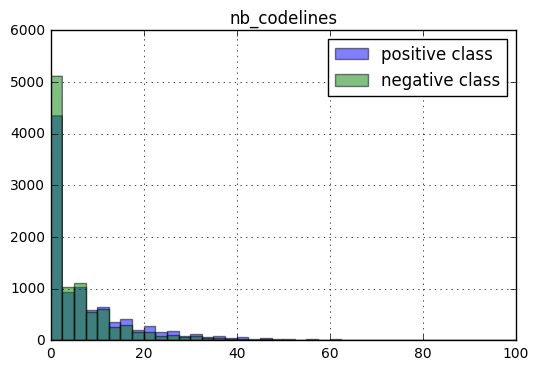

In [34]:
feature_name = 'nb_codelines'
rmax = 100
plt.figure()
Pos[feature_name].hist(
    range=[0, rmax], bins=40, alpha=0.5, label="positive class")
Neg[feature_name].hist(
    range=[0, rmax], bins=40, alpha=0.5, label="negative class")
plt.title(feature_name)
_ = plt.legend(loc="best")

>A partir de là, tracez l'ensemble des histogrammes pour chacun des features (faites une boucle). Vous pouvez récupérer la liste des features par `feature=list(Pos.columns)`.  Pour chacun des histogrammes, vous pouvez définir une valeur max pour l'abscisse.

In [35]:
# Sympathiquement, on vous donne la liste des rmax pour les abscisses, sous la forme d'un dico
feature = list(Pos.columns)
feature = feature[1:-3]  #on supprime les trois dernières colonnes 
#qui sont le score, accepted et target
r = [15, 40, 40, 500, 80, 10, 10, 40, 800, 10, 40, 2]
dico_rmax = {f: r[k] for k, f in enumerate(feature)}
print(dico_rmax)

{'av_words': 40, 'allcaps': 15, 'nb_words': 500, 'pretty': 10, 'nb_imgs': 10, 'nb_codelines': 40, 'nb_paragraphs': 40, 'nb_links': 10, 'nb_lines': 80, 'len_html': 800}


> A vous de jouer pour les autres variables explicatives


Corrigé :

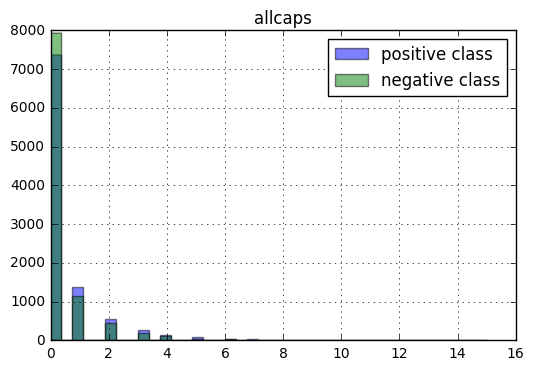

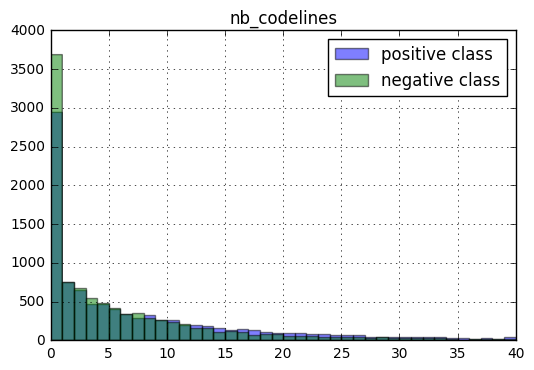

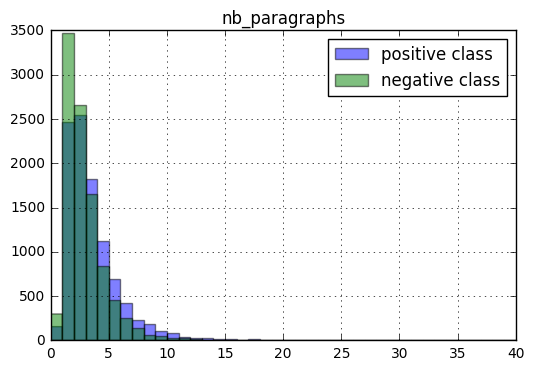

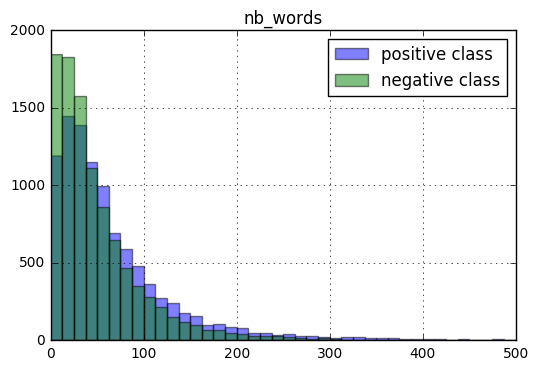

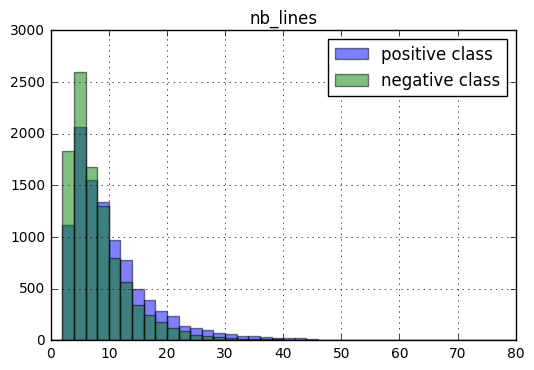

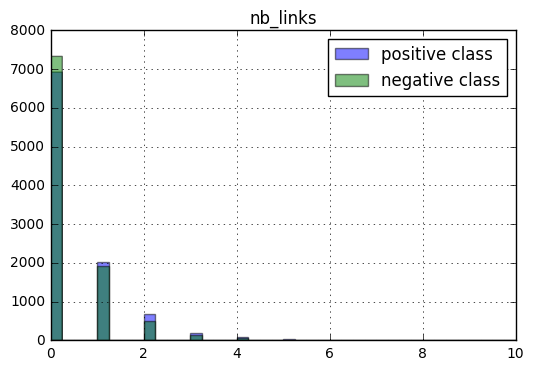

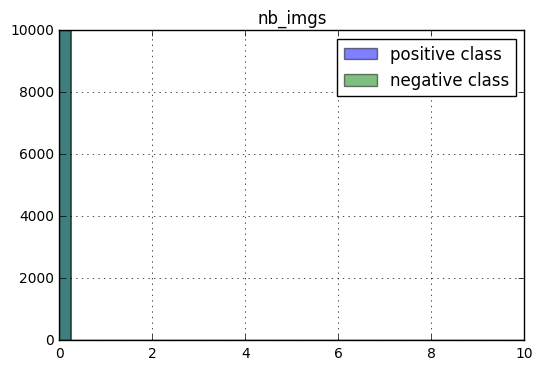

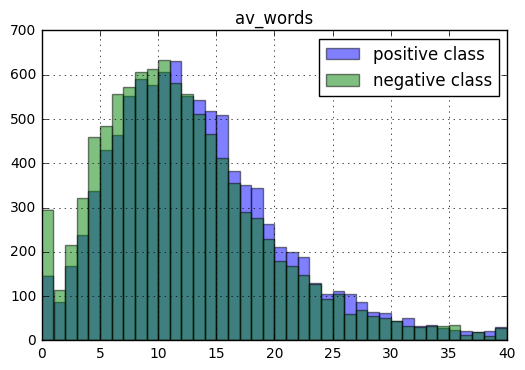

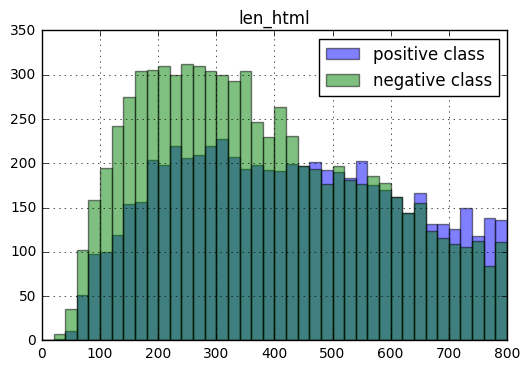

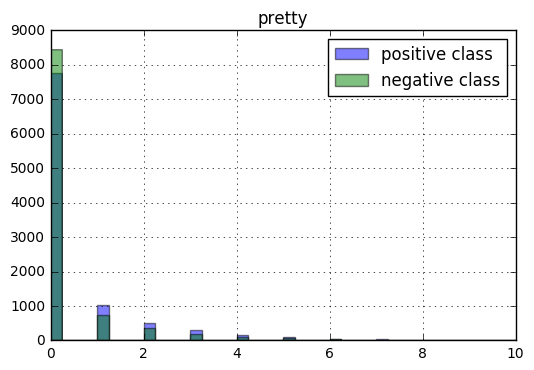

In [36]:
for feature_name in feature:
    rmax = dico_rmax[feature_name]
    plt.figure()
    Pos[feature_name].hist(
        range=[0, rmax], bins=40, alpha=0.5, label="positive class")
    Neg[feature_name].hist(
        range=[0, rmax], bins=40, alpha=0.5, label="negative class")
    plt.title(feature_name)
    _ = plt.legend(loc="best")

On voit donc qu'il n'y a pas de différence frappante de comportement entre les features. Aucun, à lui seul, ne permet de faire le tri. Il va donc falloir faire travailler tout ceci de concert. 

#### Discrimination

Pour utiliser la régression logistique, nous aurons besoin de la classe `LogisticRegression`, d'une méthode découpant en un ensemble d'apprentissage et de test, `train_test_split` et éventuellement des méthodes d'analyse et rapport `confusion_matrix`, `classification_report`. 

Celles-ci sont importées par

In [37]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

>- Découper le tableau dataset en une table `features` (sélectionner les colonnes intéressantes, à l'aide de la liste des features `feature`), et une table `target` qui extrait la colonne cible. 
- définir une base de test et une base d'apprentissage en utilisant la méthode `train_test_split(features, target)`
- instancier la classe `LogisticRegression`, par exemple sous le nom `cls`, puis apprendre par la méthode `fit` et prédire par `predict`. 

>Vous pouvez voir quels sont les coefficients obtenus par `cls.intercept_` et `cls.coef_`.

Corrigé : 

In [38]:
cls = LogisticRegression(C=1,class_weight='balanced') 
features = dataset[feature] 
target = dataset['target']
features_train, features_test, target_train, target_test = train_test_split(features, target)
cls.fit(features_train, target_train)
predictions = cls.predict(features_test)

In [39]:
cls.intercept_

array([-0.46430175])

In [40]:
cls.coef_

array([[ 0.00108948, -0.02101375,  0.03481078, -0.00454957,  0.00713896,
        -0.02196107, -0.00014171,  0.00062345,  0.00105415, -0.01599702]])

On utilisera ensuite les deux routines maison `mycfm` et `classif_eval` pour évaluer les performances. Ces deux routines peuvent être chargées par 

    from mycfm import *
    from classif_eval import *
Vous pouvez également, dans le notebook, faire un 

    %load mycfm.py
ce qui vous permet de consulter le source (et donc l'aide).     

In [41]:
from mycfm import *
from classif_eval import *

In [42]:
# %load mycfm.py
from IPython.display import HTML, display, display_html 
import numpy as np
import pandas as pd

def mycfm(y_true, y_pred):  
    """
    Rend une jolie matrice de confusion (cas binaire) et les principaux scores associés
    
    Arguments :
    -----------
    y_true: array
         les vraies classes
    y_pred: array
         les classes prédites 
    """
    CC=pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    """try:
        display_html(CC)
    except:
        print(CC)
    """    
    print(CC)    
    C=np.array(CC)
    score=(C[0,0]+C[1,1])/(C[0,0]+C[1,1]+C[0,1]+C[1,0])
    precision=(C[1,1])/(C[1,1]+C[0 ,1])
    recall=(C[1,1])/(C[1,1]+C[1,0])
    print()
    print('{s:{c}<{n}}{num:2.3}'.format(s='Score',n=15,c='', num=score))
    print('{s:{c}<{n}}{num:2.3}'.format(s='Precision',n=15,c='', num=precision))
    print('{s:{c}<{n}}{num:2.3}'.format(s='Recall',n=15,c='', num=recall))

>Il vous faut donc générer les prédictions des classes. Celles-ci sont directement retournées par `predictions = cls.predict(features_test)`, pour un seuil de 0.5. Vous pouvez également ajuster vous même le seuil en utilisant la méthode `cls.predict_proba(features_test)[:,1]` dont vous comparerez la sortie à une proba seuil. 

> - générer la matrice de confusion. Examiner les performances obtenues. 

Corrigé : 

In [43]:
predictions=cls.predict_proba(features_test)[:,1]>0.5
mycfm(target_test, predictions)

Predicted  False  True   All
True                        
0.0         1852   704  2556
1.0         1340  1104  2444
All         3192  1808  5000

Score          0.591
Precision      0.611
Recall         0.452


Donc en gros score de 60%, précision de 60% pour un recall un petit peu < 0.5. Ce n'est pas extraordinaire, mais pas insensé. 

>- Qu'obtiendrait-on en classant au hasard ? 

>En faisant varier le seuil de décision, on va examiner ce que l'on peut obtenir. Pour cela, vous utiliserez la fonction `classif_eval` qui rend les différents taux. 

>- Vous tracerez alors les courbes précision/recall/spécificité, le score, en fonction du seuil et enfin la courbe ROC. Vous pourrez utiliser ce qu'on a fait en cours [(ici)](http://perso.esiee.fr/~bercherj/IT3007/R%C3%A9gression_logistique.html#Evaluation-des-performances,-matrice-de-confusion) comme modèle. 

/usr/local/lib/python3.5/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


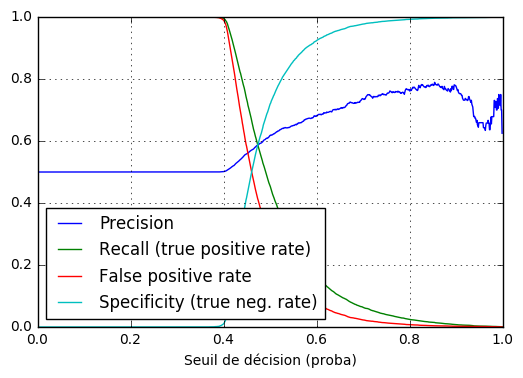

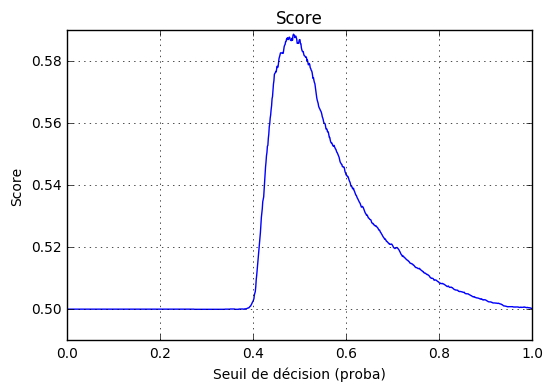

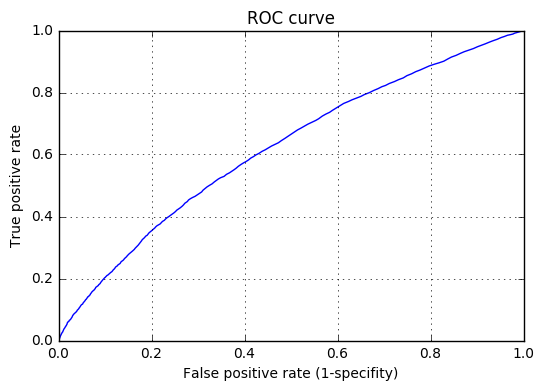

In [44]:
y_t = target  # y true
ft_test = features  #features_test
y_pred_cls = cls.predict_proba(ft_test)[:, 1]

# Caclcul des différents indicateurs de performance
tp, fp, tn, fn, total_pos, total_neg = classif_eval(
    y_t, y_pred_cls, nb_values=1000)
nb_values = len(tp)
proba = np.linspace(0, 1, nb_values)

# Figure 1 -- précision/recall/ faux positifs/ spécificité
plt.plot(proba, tp / (tp + fp), label="Precision")
#precision = positive predictive value
plt.plot(proba, tp / (fn + tp), label="Recall (true positive rate)")
#recall  = true positive rate
plt.plot(proba, fp / (fp + tn), label="False positive rate")
#false positive rate
plt.plot(proba, tn / (fp + tn), label="Specificity (true neg. rate)")
#specificity
plt.xlabel("Seuil de décision (proba)")
plt.grid(b=True)
_ = plt.legend(loc="best")  #(1.1,0.7))
#

#
# Figure 2 -- Score en fonction du seuil
plt.figure()
plt.title("Score")
plt.plot(np.linspace(0, 1, nb_values), (tp + tn) / (total_pos + total_neg))
plt.xlabel("Seuil de décision (proba)")
plt.ylabel("Score")
plt.grid(b=True)

# Figure 3 -- Courbe ROC
plt.figure()
plt.title("ROC curve")
plt.plot(fp / (fp + tn), tp / total_pos)  #True positive/ False positive 
# (sensibility / 1 - specificity)
plt.xlabel("False positive rate (1-specifity)")
plt.ylabel("True positive rate")
plt.grid(b=True)

On voit que le meilleur score que l'on peut obtenir est de l'ordre de 0.6 (pour un seuil de ~ 0.47). On peut obtenir une meilleure précision, mais au détriment du recall (taux de vrais positifs : il y a très peu d'échantillons classés positifs -- la plupart sont classés en négatifs, du coup la précision augmente, mais les taux de vrais et faux positifs s'effondrent). 

NB -- On aurait sans doute pu faire un peu mieux, en ajoutant à l'analyse de la syntaxe la délai de réponse. En général les réponses acceptées sont les premières réponses correctes (même si de meilleures arrivent par la suite). Je n'ai pas sauvegardé les dates de réponse, et ce sera donc pour l'année prochaine... 


**Le joker**

In [45]:
p = cls.predict_proba(features_test)[:, 1]
I = (p < 0.6) * (p > 0.4)

In [46]:
len(p[~I])

642

In [47]:
len(p)

5000

In [48]:
pp = p[~I]
tt = target_test[~I]
mycfm(tt, pp > 0.5)

Predicted  False  True  All
True                       
0.0           24   211  235
1.0           13   394  407
All           37   605  642

Score          0.651
Precision      0.651
Recall         0.968


A tout hasard, on regarde ça aussi

In [49]:
A=AA
predic = cls.predict_proba(A.loc[:200000][feature])[:, 1] > 0.5
mycfm(A.loc[:200000]['accepted'] > 0, predic)

Predicted   False   True     All
True                            
False       87357  30571  117928
True        49466  32607   82073
All        136823  63178  200001

Score          0.6
Precision      0.516
Recall         0.397


### Seconde question

On s'intéresse maintenant à une question un peu différente. Est-on capable de discriminer les réponses qui ont un peu d'intérêt, de score >0 des réponses pas bonnes (score < 0) ou pas intéressantes (score=0). 

- <span style="color:blue"> est-il possible de discriminer les réponses correctes (note >0) des autres ?</span>

C'est exactement la  même histoire que précédemment, on modifie simplement la cible `target` par le résultat d'un test sur le score. 

On le fait pour vous. Vous devez comprendre. 

In [50]:
# sous échantillonnage de la grosse table
AAnew = AA.loc[np.random.choice(
    np.shape(AA)[0], size=100000, replace=False)]  # pour un dataframe
dataset = AAnew
# définition de la cible
dataset['target'] = dataset['score'] > 0
# mapping car sklearn veut des nombres
dataset['target'] = dataset['target'].map({True: 1, False: 0})
# on affiche le début de la table pour vérifier
dataset.head()


,Unnamed: 0,allcaps,nb_codelines,nb_paragraphs,nb_words,nb_lines,nb_links,nb_imgs,av_words,len_html,pretty,score,accepted,target
44469,44469,4,0,3,16,6,3,0,16.000000,399,1,1,0,1
292470,292470,0,0,2,157,32,0,0,13.250000,1176,0,1,1,1
326107,326107,0,9,3,46,8,0,0,15.333333,627,0,4,1,1
231661,231661,0,0,1,5,2,0,0,1.333333,67,0,1,0,1
285655,285655,0,23,2,5,8,0,0,5.000000,894,0,5,0,1


>- implanter une régression logistique pour ce problème,
- examinez la matrice de confusion, 
- tracer les courbes de perf. 

>Commenter sur les performances. Optimiser les paramètres pour trouver une précision aussi grande que possible, un taux de vrais négatifs > 40%, un recall (taux de vrais positifs) > 40%.

In [51]:
# Régression logistique
#
# A vous de jouer


In [52]:
# calcul et affichage de la matrice de confusion
#
# A vous de jouer


In [53]:
#Courbes de performances
#
# A vous de jouer

In [54]:
#Sélection d'un seuil et affichage de matrice de confusion correspondant aux perfs pour ce seuil
#
# A vous de jouer


Corrigé : 

In [55]:
cls = LogisticRegression(C=1, class_weight='balanced')
features = dataset[feature]
target = dataset['target']
features_train, features_test, target_train, target_test = train_test_split(
    features, target)
cls.fit(features_train, target_train)
predictions = cls.predict(features_test)

In [56]:
predictions=cls.predict_proba(features_test)[:,1]>0.5
mycfm(target_test, predictions)

Predicted  False  True    All
True                         
0           4508  1997   6505
1          10573  7922  18495
All        15081  9919  25000

Score          0.497
Precision      0.799
Recall         0.428


Commentaires:

Cette fois-ci, si le score est toujours de 50%, pas mieux que le hasard total, on a une précision de 80%. Cela signifie que si on a classé une réponse comme positive, on a quand même 80% de proba que ce soit effectivement le cas. Bien entendu, on pourrait avoir une précision de 100% en classant tous les posts comme positifs ; et on aurait un score de (?). Il faut donc contraindre aussi les taux de vrais positifs et vrais négatifs. Les valeurs exactes dépendent de l'application et de l'art de l'ingénieur.

Courbes de performances

/usr/local/lib/python3.5/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


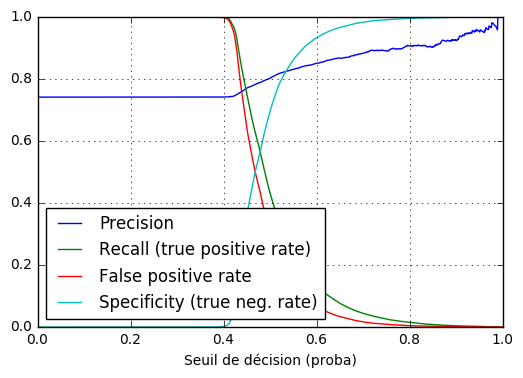

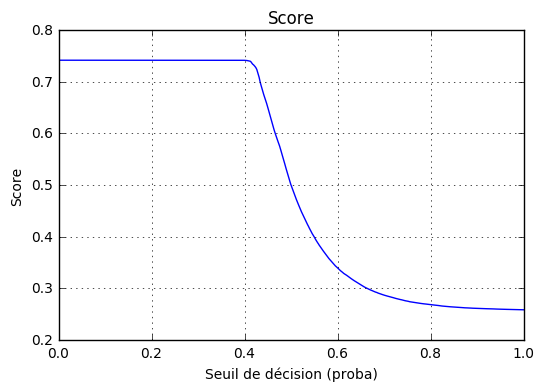

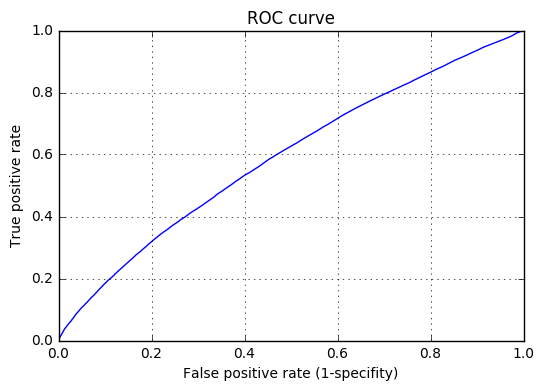

In [57]:
y_t = target  # y true
ft_test = features  #features_test
y_pred_cls = cls.predict_proba(ft_test)[:, 1]

# Caclcul des différents indicateurs de performance
tp, fp, tn, fn, total_pos, total_neg = classif_eval(
    y_t, y_pred_cls, nb_values=1000)
nb_values = len(tp)
proba = np.linspace(0, 1, nb_values)

# Figure 1 -- précision/recall/ faux positifs/ spécificité
plt.plot(proba, tp / (tp + fp), label="Precision")
#precision = positive predictive value
plt.plot(proba, tp / (fn + tp), label="Recall (true positive rate)")
#recall  = true positive rate
plt.plot(proba, fp / (fp + tn), label="False positive rate")
#false positive rate
plt.plot(proba, tn / (fp + tn), label="Specificity (true neg. rate)")
#specificity
plt.xlabel("Seuil de décision (proba)")
plt.grid(b=True)
_ = plt.legend(loc='lower left')  #(1.1,0.7))
#

#
# Figure 3 -- Score en fonction du seuil
plt.figure()
plt.title("Score")
plt.plot(np.linspace(0, 1, nb_values), (tp + tn) / (total_pos + total_neg))
plt.xlabel("Seuil de décision (proba)")
plt.ylabel("Score")
plt.grid(b=True)

# Figure 3 -- Courbe ROC
plt.figure()
plt.title("ROC curve")
plt.plot(fp / (fp + tn), tp / total_pos)  #True positive/ False positive 
# (sensibility / 1 - specificity)
plt.xlabel("False positive rate (1-specifity)")
plt.ylabel("True positive rate")
plt.grid(b=True)

Avec les courbes obtenues sur l'ensemble de la base, on obtiendrait un seuil "optimal" (avec les critères qu'on s'est donnés), de ~0.48.   

In [58]:
predictions=cls.predict_proba(features_test)[:,1]>0.46
mycfm(target_test, predictions)

Predicted  False   True    All
True                          
0           2882   3623   6505
1           5890  12605  18495
All         8772  16228  25000

Score          0.619
Precision      0.777
Recall         0.682


Pas forcément si mal. On classe correctement entre la moitié et 2/3 des réponses, et si elles sont classés positives, alors on a entre 75 et 80% de chance que ce soit vrai. 

**Au final**, en ne s'appuyant uniquement sur une analyse quantitative des réponses, on arrive à faire une discrimination qui n'est pas ridicule. Il est clair que si on intégrait des mots clés mesurant la pertinence en fonction des sujets, on pourrait augmenter un peu le score. 

Il apparaît également qu'il aurait fallu tenir compte des dates et délais. En effet, on peut voir facilement que le score augmente avec l'ancienneté des messages (il y a plus de temps pour les internautes pour noter les messages). ceci introduit donc probablement un biais dans l'évaluation de la qualité. 

In [59]:
print("score moyen (toute la base) : ", np.mean(AA['score']))
print("score moyen (1er 1/4 de la base) : ", np.mean(AA['score'][0:100000]))
print("score moyen (2e 1/4 de la base) : ", np.mean(AA['score'][100000:200000]))
print("score moyen (3e 1/4 de la base) : ", np.mean(AA['score'][200000:300000]))
print("score moyen (4e 1/4 de la base) : ", np.mean(AA['score'][300000:400000]))

score moyen (toute la base) :  3.30277435204
score moyen (1er 1/4 de la base) :  5.98599
score moyen (2e 1/4 de la base) :  3.46937
score moyen (3e 1/4 de la base) :  2.41221
score moyen (4e 1/4 de la base) :  1.38979
